In [197]:
import pandas as pd
import json
import numpy as np
from datetime import datetime

data_path = "C:\\Work\\Data Engeneer\\Sample Data"
print ("Loading users")
users_df = pd.read_csv (data_path+"\\users.csv")
users_df.categories=users_df.categories.str.split(';')
print ("--------------------------")             
print ("Loading videos")
videos_df = pd.read_csv (data_path+"\\videos.csv")
print ("Deleting invalid videos")
videos_df = videos_df.drop(videos_df[videos_df['url'].map(len) < 5].index)
print ("Converting creation timestamp to datetime")
videos_df['creation_timestamp']=pd.to_datetime(pd.to_numeric(videos_df['creation_timestamp']), unit='s')
print ("--------------------------")             
print ("Loading user actions")
user_actions = pd.DataFrame()

try:
    with open(data_path+"\\events.jsonl") as file:
        for line in file:
            if line.find("{\"events\":[") != -1:            
                json_object = json.loads(line)
                df = pd.DataFrame(json_object["events"])
                df['timestamp']=pd.to_datetime(df['timestamp'], unit='s')
                user_actions = pd.concat([user_actions, df])
            else:
                df = pd.read_json("["+line+"]")
                user_actions = pd.concat([user_actions, df])
except Exception as e:
    print('Something went wrong {0}'.format(e))

print ("--------------------------")             
print ("Task 1. Event types list")
print(sorted(user_actions['event'].unique()))

Loading users
--------------------------
Loading videos
Deleting invalid videos
Converting creation timestamp to datetime
--------------------------
Loading user actions
--------------------------
Task 1. Event types list
['add_tags', 'commented', 'created', 'like', 'remove_tags']


In [198]:
likes_detailed_df = user_actions.loc[user_actions['event'] == "like"][["video_id", "timestamp"]].merge(videos_df, 
                                                                                              how='left',
                                                                                              left_on='video_id', 
                                                                                              right_on='id')[["name", "timestamp"]]
likes_detailed_df['timestamp'] = pd.to_datetime(likes_detailed_df['timestamp']).dt.date
likes_dates_df = likes_detailed_df.groupby(['timestamp'])['name'].count()

In [199]:
likes_grouped_df = likes_detailed_df.groupby(['name'])['name'].count()

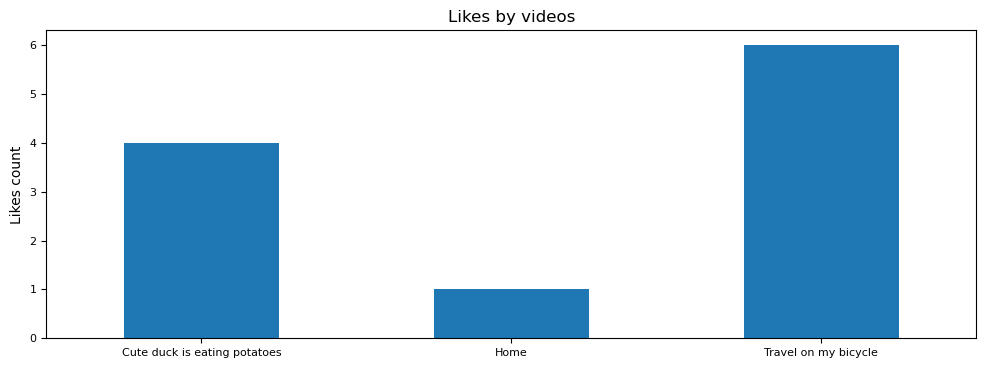

In [200]:
plot = likes_grouped_df.plot.bar(rot=0, title='Likes by videos', xlabel='', ylabel='Likes count', fontsize=8, figsize=(12, 4))

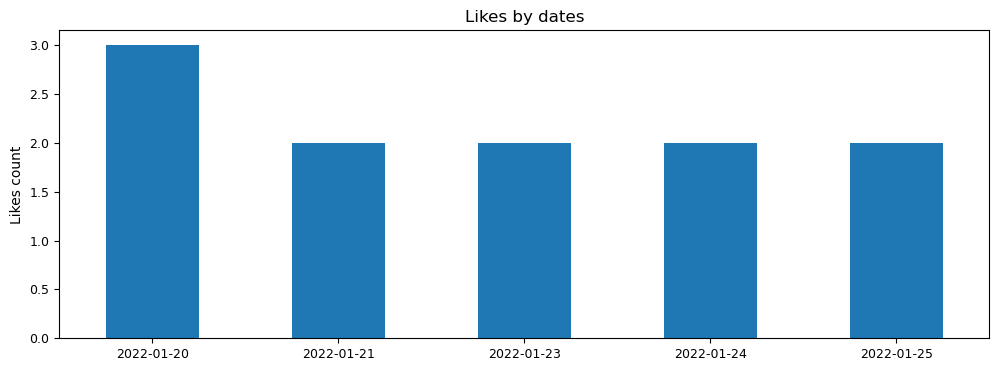

In [201]:
plot2 = likes_dates_df.plot.bar(rot=0, title='Likes by dates',  xlabel='', ylabel='Likes count', fontsize=9, figsize=(12, 4))

In [202]:
#users_df

In [203]:
#user_actions

In [204]:
events_tags_list = ['created', 'add_tags'] 
events_tags_df = user_actions[user_actions['event'].isin(events_tags_list)][["video_id", "tags"]]

events_watch_list = ['like', 'commented']
videos_watched_df = user_actions[user_actions['event'].isin(events_watch_list)][["user_id", "video_id"]]

In [205]:
events_tags_df=events_tags_df.groupby('video_id').agg(sum)

In [206]:
my_df=videos_watched_df.merge(users_df, how='inner',left_on='user_id', right_on='id')
[["fname", "lname", "video_id", "categories"]]

[['fname', 'lname', 'video_id', 'categories']]

In [207]:
my_df2=my_df.merge(events_tags_df, how='left', left_on='video_id', right_on='video_id')[["user_id", "video_id", "categories", "tags"]]

In [208]:
my_df2['tags'] = my_df2['tags'].fillna("")

In [209]:
my_df2['tags_match'] = [list(set(a).intersection(set(b))) 
                      for a, b in zip(my_df2.categories, my_df2.tags)]

In [210]:
my_df2[["user_id", "video_id", "tags_match"]]

,user_id,video_id,tags_match
0,4,100,"[duck, animals]"
1,4,101,[]
2,4,101,[]
3,4,110,[]
4,2,100,"[duck, cute]"
5,2,100,"[duck, cute]"
6,3,100,"[animals, cute]"
7,5,100,"[food, cute]"
8,5,101,[]
9,6,100,"[food, animals]"
